# Entropia

Este notebook tem por objetivo introduzir o conceito de entropia de uma distribuição de probabilidade

Segundo a [wikipedia](https://en.wikipedia.org/wiki/Entropy_(information_theory)) (em tradução livre):
> *Entropia é a taxa média com a qual uma informação é amostrada de uma fonte de dados estocástica.*

Para uma distribuição de probabilidade entendemos esta medida como sendo o quão "aleatória" uma distribuição é.
Em outras palavras podemos dizer que a entropia mede quanto uma amostra de uma distribuição pode diferir de outra
amostra da mesma distribuição.



### Imports

> **Atenção:** não se esqueça de executar todos os `imports` necessários antes prosseguir com o tutorial. 

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
from random import random, seed
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
from matplotlib import cm

## Exemplo 1: distribuição Bernoulli

Abaixo mostramos a variação de entropia de uma distribuição de Bernoulli de acordo com a variação 
do valor da probabilidade do valor amostrado ser 1

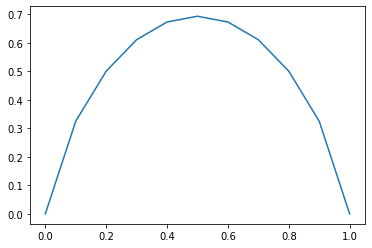

In [2]:
xs = []
entropies = []
for i in range(11):
    x = 0.1 * i
    xs.append(x)
    dist = tfp.distributions.Bernoulli(probs=[x])
    entropies.append(dist.entropy())

plt.plot(xs, entropies)

## Exemplo 2: distribuição Categórica

Abaixo mostramos a variação de entropia de uma distribuição categórica com 3 opções (0, 1 e 2),
fixando as probabilidades de 0 e 1.

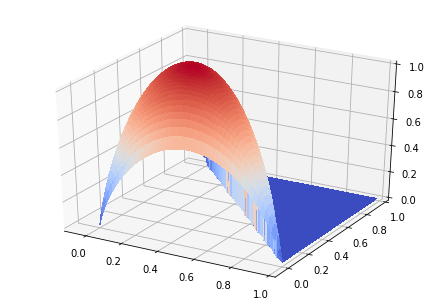

In [3]:
fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...

l = 100

X = np.arange(0, 1, 1/l)
Y = np.arange(0, 1, 1/l)
X, Y = np.meshgrid(X, Y)
Z = 1 - X - Y
X = X.reshape(l**2)
Y = Y.reshape(l**2)
Z = Z.reshape(l**2)
probs = list(zip(X, Y, Z))
dist = tfp.distributions.Categorical(probs=probs)
ent = np.nan_to_num(dist.entropy().numpy().reshape(l,l))

ax.set_zlim(0, 1.0)
ax.set_xlim(-.1, 1.01)
ax.set_ylim(-.1, 1.01)

surf = ax.plot_surface(X.reshape(l,l), Y.reshape(l,l), ent, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

## Exemplo 3: distribuição Normal

Abaixo mostramos a variação de entropia de uma distribuição Normal, variando o desvio padrão.
Primeiro vamos relembrar o comportamento da gaussiana quando fixamos a média em zero e variamos
o desvio padrão.

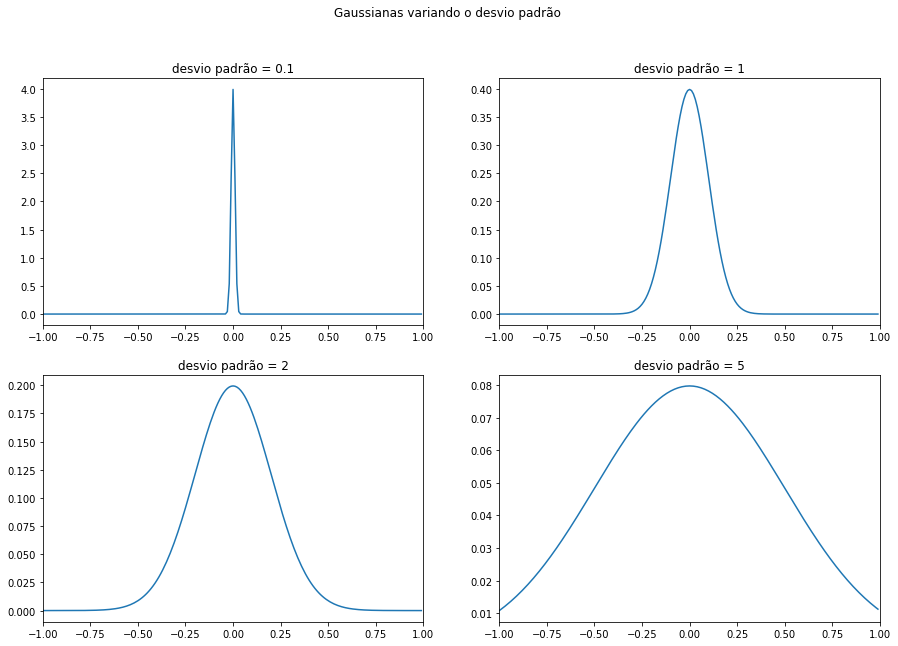

In [27]:
def get_gaussian(loc, scale):
    xs = []
    probs = []
    dist = tfp.distributions.Normal(loc=loc, scale=scale)
    for i in np.arange(-10, 10, .1):
        x = 0.1 * i
        xs.append(x)
        probs.append(dist.prob(i))

    return xs, probs

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
fig.suptitle('Gaussianas variando o desvio padrão')
std_dev = [[.1, 1],[2, 5]]
for i in range(2):
    for j in range(2):
        xs, probs = get_gaussian(0, std_dev[i][j])
        
        axs[i][j].set_title(f"desvio padrão = {std_dev[i][j]}")
        axs[i][j].plot(xs, probs)
        axs[i][j].set_xlim(-1, 1)

plt.show()


Agora vamos ver como se comporta a entropia desta distribuição:

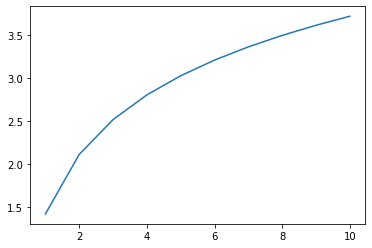

In [30]:
xs = []
entropies = []
for i in range(11):
    xs.append(i)
    dist = tfp.distributions.Normal(loc=0, scale=i)
    entropies.append(dist.entropy())

plt.plot(xs, entropies)